# DAI-101 Assignment

- Mrinal Subudhi
- 23117083
- ME-4 Batch-1

## Introduction

OBJECTIVE: To enhance restaurants' understanding of tipping behavior, helping tailor services and optimize operations develop a predictive model to estimate tip amounts in restaurants based on customer billing and demographic details

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Ridge, Lasso 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder,StandardScaler,LabelEncoder

import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_rainbow

In [2]:
df = pd.read_csv("./tips (data for regression problem).csv")
df.sample(5)

,total_bill,tip,sex,smoker,day,time,size
31,18.35,2.50,Male,No,Sat,Dinner,4
232,11.61,3.39,Male,No,Sat,Dinner,2
230,24.01,2.00,Male,Yes,Sat,Dinner,4
234,15.53,3.00,Male,Yes,Sat,Dinner,2
11,35.26,5.00,Female,No,Sun,Dinner,4


### Exploratory Data Analysis to get an overview of the dataset

In [3]:
df.sample(10)

,total_bill,tip,sex,smoker,day,time,size
190,15.69,1.50,Male,Yes,Sun,Dinner,2
110,14.00,3.00,Male,No,Sat,Dinner,2
109,14.31,4.00,Female,Yes,Sat,Dinner,2
134,18.26,3.25,Female,No,Thur,Lunch,2
153,24.55,2.00,Male,No,Sun,Dinner,4
96,27.28,4.00,Male,Yes,Fri,Dinner,2
203,16.40,2.50,Female,Yes,Thur,Lunch,2
146,18.64,1.36,Female,No,Thur,Lunch,3
76,17.92,3.08,Male,Yes,Sat,Dinner,2
81,16.66,3.40,Male,No,Thur,Lunch,2


In [4]:
df.shape

(244, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [6]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [7]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [8]:
duplicate_rows = df.duplicated()
print(f"Duplicate rows:\n{duplicate_rows}")
print(f"Number of duplicate rows: {duplicate_rows.sum()}")

Duplicate rows:
0      False
1      False
2      False
3      False
4      False
       ...  
239    False
240    False
241    False
242    False
243    False
Length: 244, dtype: bool
Number of duplicate rows: 1


In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.shape

(243, 7)

In [11]:
print(df["sex"].unique())
print(df["time"].unique())
print(df["smoker"].unique())
print(df["day"].unique())
print(df["size"].unique())

['Female' 'Male']
['Dinner' 'Lunch']
['No' 'Yes']
['Sun' 'Sat' 'Thur' 'Fri']
[2 3 4 1 6 5]


#### Scatter Plots

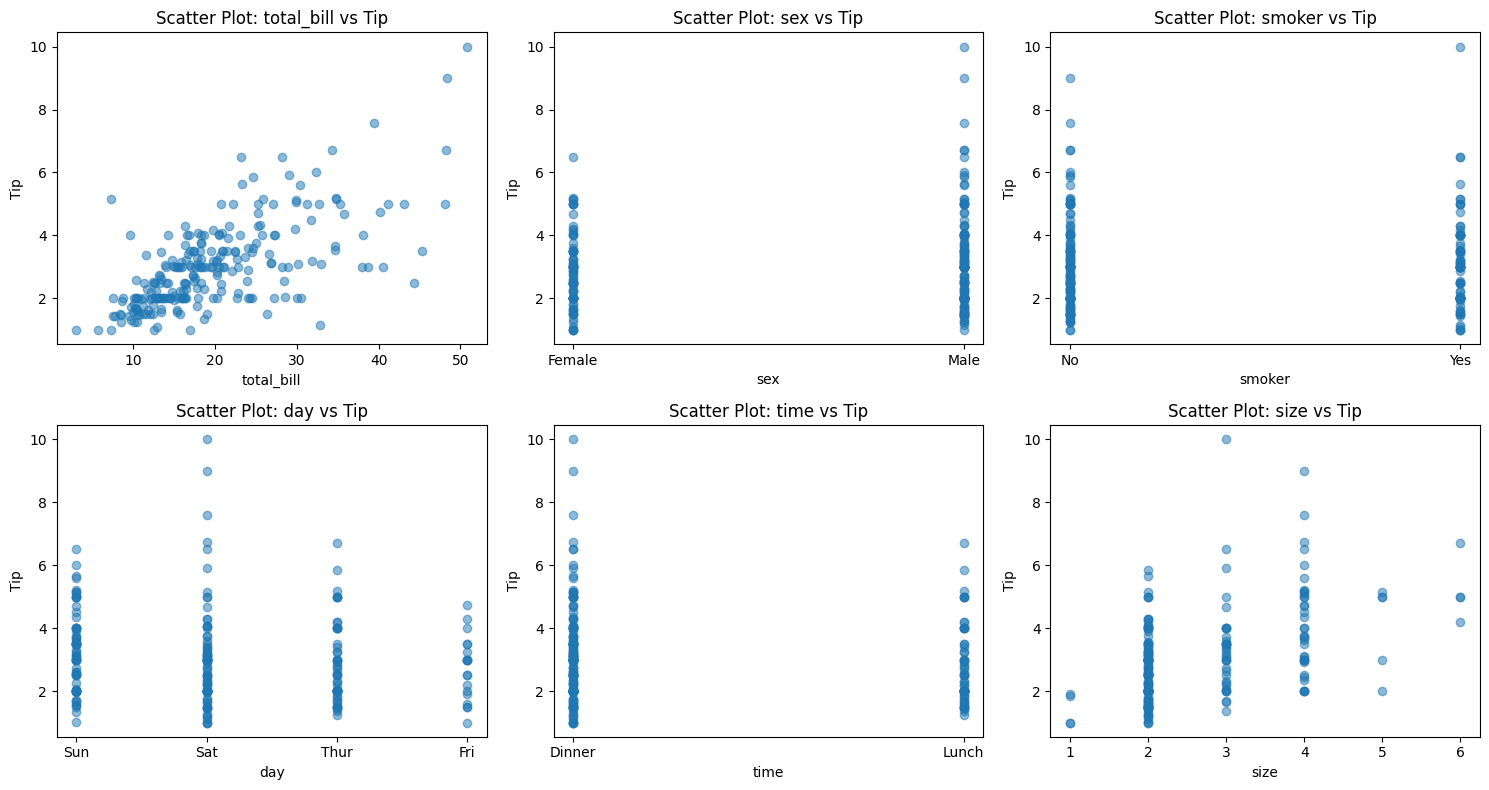

In [12]:
plt.figure(figsize=(15, 8))
for i, predictor in enumerate(df.drop('tip', axis=1).columns, 1):
    plt.subplot(2, (len(df.drop('tip', axis=1).columns) + 1) // 2, i)
    plt.scatter(df[predictor], df['tip'], alpha=0.5)
    plt.title(f'Scatter Plot: {predictor} vs Tip')
    plt.xlabel(predictor)
    plt.ylabel('Tip')
plt.tight_layout()
plt.show()


- We notice that a higher amount of tip corresponds to a higher total bill
- We also notice that the tip amount is higher for the dinner time compared to the lunch time
- the lowest amount of tips arereceived on the Friday
- The highest variance in tips are received on the Saturday
- The highest amount of tips are received on the Sunday
- Men tip noticably more than women do
- Smokers and non-smokers tip about equally

### Pair Plots

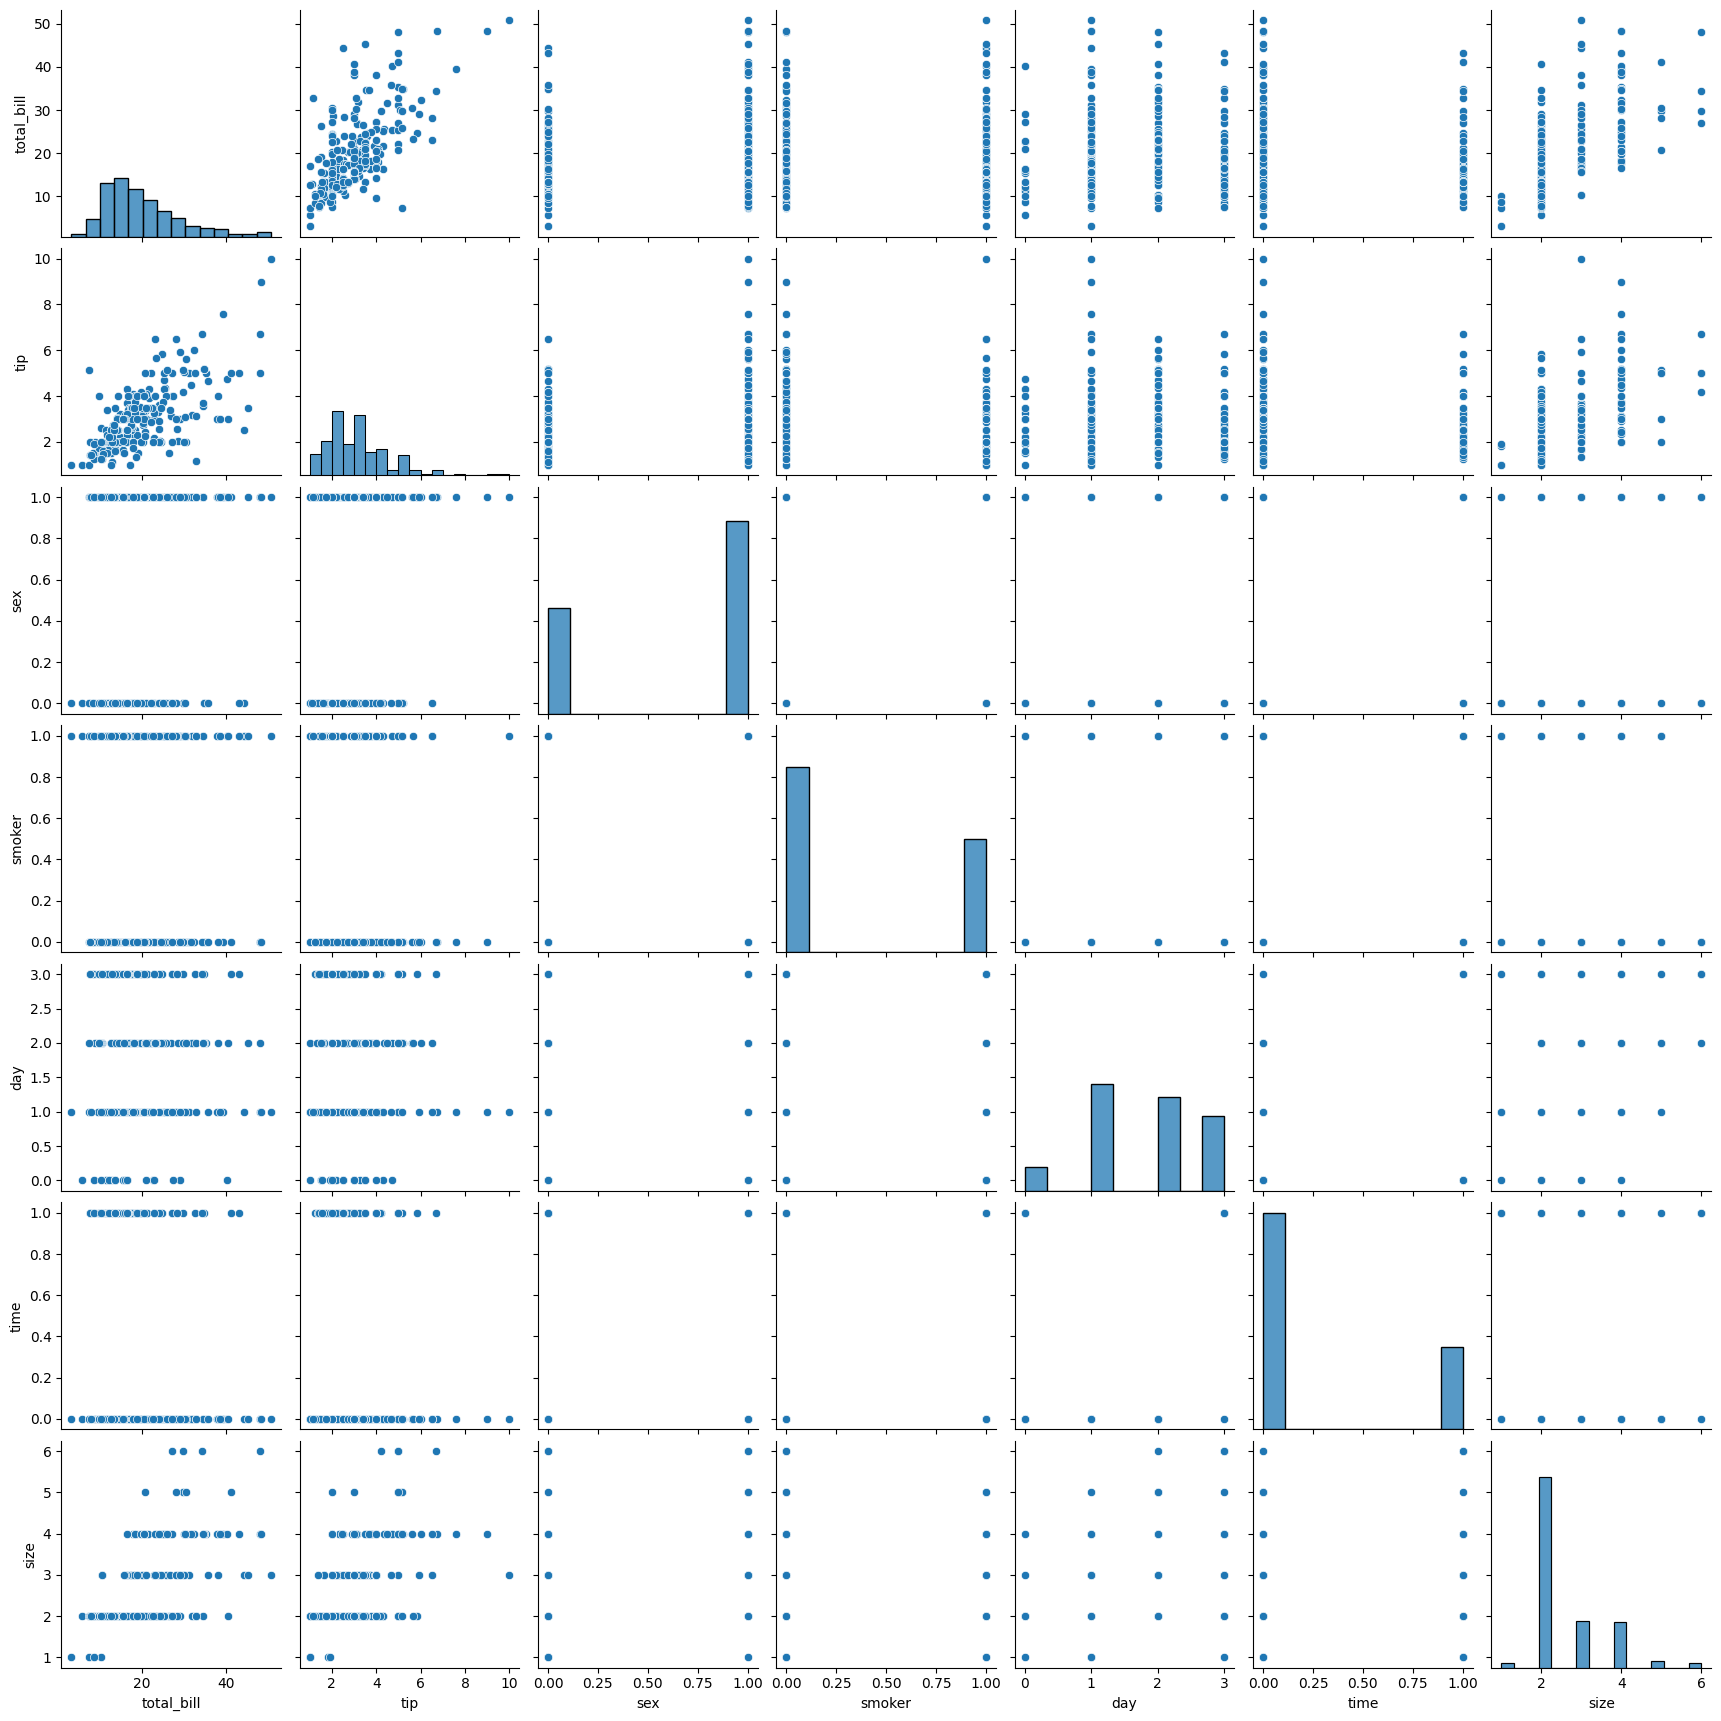

In [13]:
df_dummy = df.copy()
label_encoder = LabelEncoder()
df_dummy['sex'] = label_encoder.fit_transform(df['sex'])
df_dummy['smoker'] = label_encoder.fit_transform(df['smoker'])
df_dummy['day'] = label_encoder.fit_transform(df['day'])
df_dummy['time'] = label_encoder.fit_transform(df['time'])

sns.pairplot(df_dummy)

### Correlation Matric (Heatmap)

<Axes: >

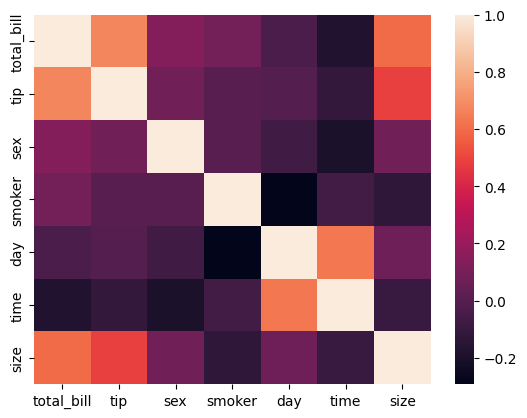

In [14]:
corr = df_dummy.corr()
sns.heatmap(corr)


From the above we can observe that total bill and size are the two most correlated feature with the target variable tip

### Statistical tests for Linearity (Rainbow Test)

In [15]:
import statsmodels.api as sm
# Define independent (X) and dependent (y) variables
X = df_dummy.drop(columns=['tip'])
X = sm.add_constant(X)
y = df['tip']

# Fit the linear regression model
model = sm.OLS(y, X).fit()

from statsmodels.stats.diagnostic import linear_rainbow

test_stat, p_value = linear_rainbow(model)

print(f"Rainbow Test Statistic: {test_stat}")
print(f"P-value: {p_value}")

Rainbow Test Statistic: 1.2896906717861407
P-value: 0.08500916738766717


#### Observations from the rainbow test
- The null hypothesis is that the regression is correctly modelled as linear.
- The alternative hypothesis is that the regression is not correctly modelled as linear.

- If the p-value > 0.05: We accept the null hypothesis that the regression is correctly modeled as linear.
- If the p-value < 0.05: We reject the null hypothesis, suggesting that the model might benefit from non-linear approaches.

So, in your case, since p > 0.05, we accept the null hypothesis, which supports the use of linear models. This result indicates that linear regression models, including ridge and lasso, should work effectively for your data.

However, testing non-linear models like Random Forest is still beneficial for comparison, as they might capture any subtle non-linear patterns that linear models may overlook.

### Residual plots are plotted at the end of every model performance metrics are checked

### Lineplot (for time-series data)

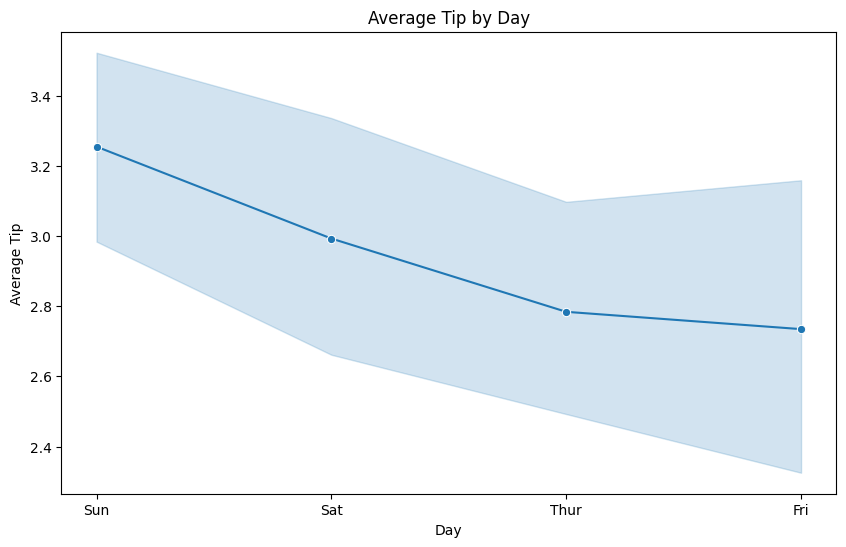

In [16]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="day", y="tip", estimator="mean", marker="o")
plt.title("Average Tip by Day")
plt.xlabel("Day")
plt.ylabel("Average Tip")
plt.show()


### After the above Analysis some of the insights we find is

- We can observe here that a higher amount of tip corresponds to a higher total bill
- Whether Smokers or non-smokers tip remains unaffected.
- There is a clear view that Men tip more than Women.
- We also notice that the tip amount is higher for the dinner time compared to the lunch time
- The lowest amount of tips are received on the Friday
- The highest variance in tips are received on the Saturday
- The highest amount of tips are received on the Sunday

### Data Preparation for model testing

In [17]:
df_data = df.drop(columns=['tip','time'])
df_target = df['tip']

In [18]:
df_data.sample(5)

,total_bill,sex,smoker,day,size
151,13.13,Male,No,Sun,2
8,15.04,Male,No,Sun,2
46,22.23,Male,No,Sun,2
39,31.27,Male,No,Sat,3
206,26.59,Male,Yes,Sat,3


In [19]:
label_encoder = LabelEncoder()
df_data['sex'] = label_encoder.fit_transform(df['sex'])
df_data['day'] = label_encoder.fit_transform(df['day'])
df_data['smoker'] = label_encoder.fit_transform(df['smoker'])

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test)

### Regression Model techniques

#### Linear Regression Model

In [21]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_linear)
r2_lr = r2_score(y_test, y_pred_linear)
print("Linear Regression -\nMSE:", mse_lr, "\nR^2:", r2_lr, "\nRMSE:", np.sqrt(mse_lr))


Linear Regression -
MSE: 1.169891685438457 
R^2: 0.5198425346286455 
RMSE: 1.0816153130565678


#### Ridge Regreesion Model

In [22]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print("Ridge Regression -\nMSE:", mse_ridge, "\nR^2:", r2_ridge, "\nRMSE:", np.sqrt(mse_ridge))

Ridge Regression -
MSE: 1.17263304365338 
R^2: 0.5187174017393907 
RMSE: 1.0828818234938566


#### Lasso Regreesion Model

In [23]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print("Lasso Regression -\nMSE:", mse_lasso, "\nR^2:", r2_lasso, "\nRMSE:", np.sqrt(mse_lasso))

Lasso Regression -
MSE: 1.2176213697088816 
R^2: 0.5002528884182162 
RMSE: 1.1034588210299836


#### Decision Tree model

In [24]:
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

# Evaluate model
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)
print("Decision Tree -\nMSE:", mse_tree, "\nR^2:", r2_tree, "\nRMSE:", np.sqrt(mse_tree))

Decision Tree -
MSE: 2.0977081632653065 
R^2: 0.13903975274020763 
RMSE: 1.4483466999531938


#### Random Forest Model

In [25]:
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_forest = rf_model.predict(X_test)

mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)
print("Random Forest -\nMSE:", mse_forest, "\nR^2:", r2_forest, "\nRMSE:", np.sqrt(mse_forest))


Random Forest -
MSE: 1.3253275951020407 
R^2: 0.4560471308825408 
RMSE: 1.1512287327469033


#### SVR Model

In [26]:
svr_model = SVR(kernel='linear')
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)

mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print("Support Vector Regression -\nMSE:", mse_svr, "\nR^2:", r2_svr, "\nRMSE:", np.sqrt(mse_svr))

Support Vector Regression -
MSE: 1.1255803752455014 
R^2: 0.5380291810116902 
RMSE: 1.060933728017684


#### KNN Model

In [27]:
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Evaluate model
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
print("K-Nearest Neighbors -\nMSE:", mse_knn, "\nR^2:", r2_knn, "\nRMSE:", np.sqrt(mse_knn))


K-Nearest Neighbors -
MSE: 1.6866271020408161 
R^2: 0.30775933838778113 
RMSE: 1.2987020836361263


## From the above model metrics we conclude that
- SVR is the best model
- It has the R2 value and
- Lowest MSE

In [28]:
feature_importance = pd.Series(np.abs(svr_model.coef_[0]), index=X.columns) 
significant_features = feature_importance[feature_importance != 0].sort_values(ascending=False) 
print("Significant Factors impacting tips:") 
print(significant_features)

Significant Factors impacting tips:
total_bill    0.806634
size          0.222265
smoker        0.067296
sex           0.062315
day           0.042247
time          0.025941
dtype: float64


Best model is the one with highest R^2 and lowest MSE, so in this case,and here it is coming out to be SVR, it gave the best performance, as it likely captured the complex patterns in the data that other models may have missed, especially since Random Forest excels with non-linear relationships. This supports the analysis, as even though the Rainbow Test suggested linearity, SVR outperformed other models, indicating it was better suited to capture nuanced variations in the data.

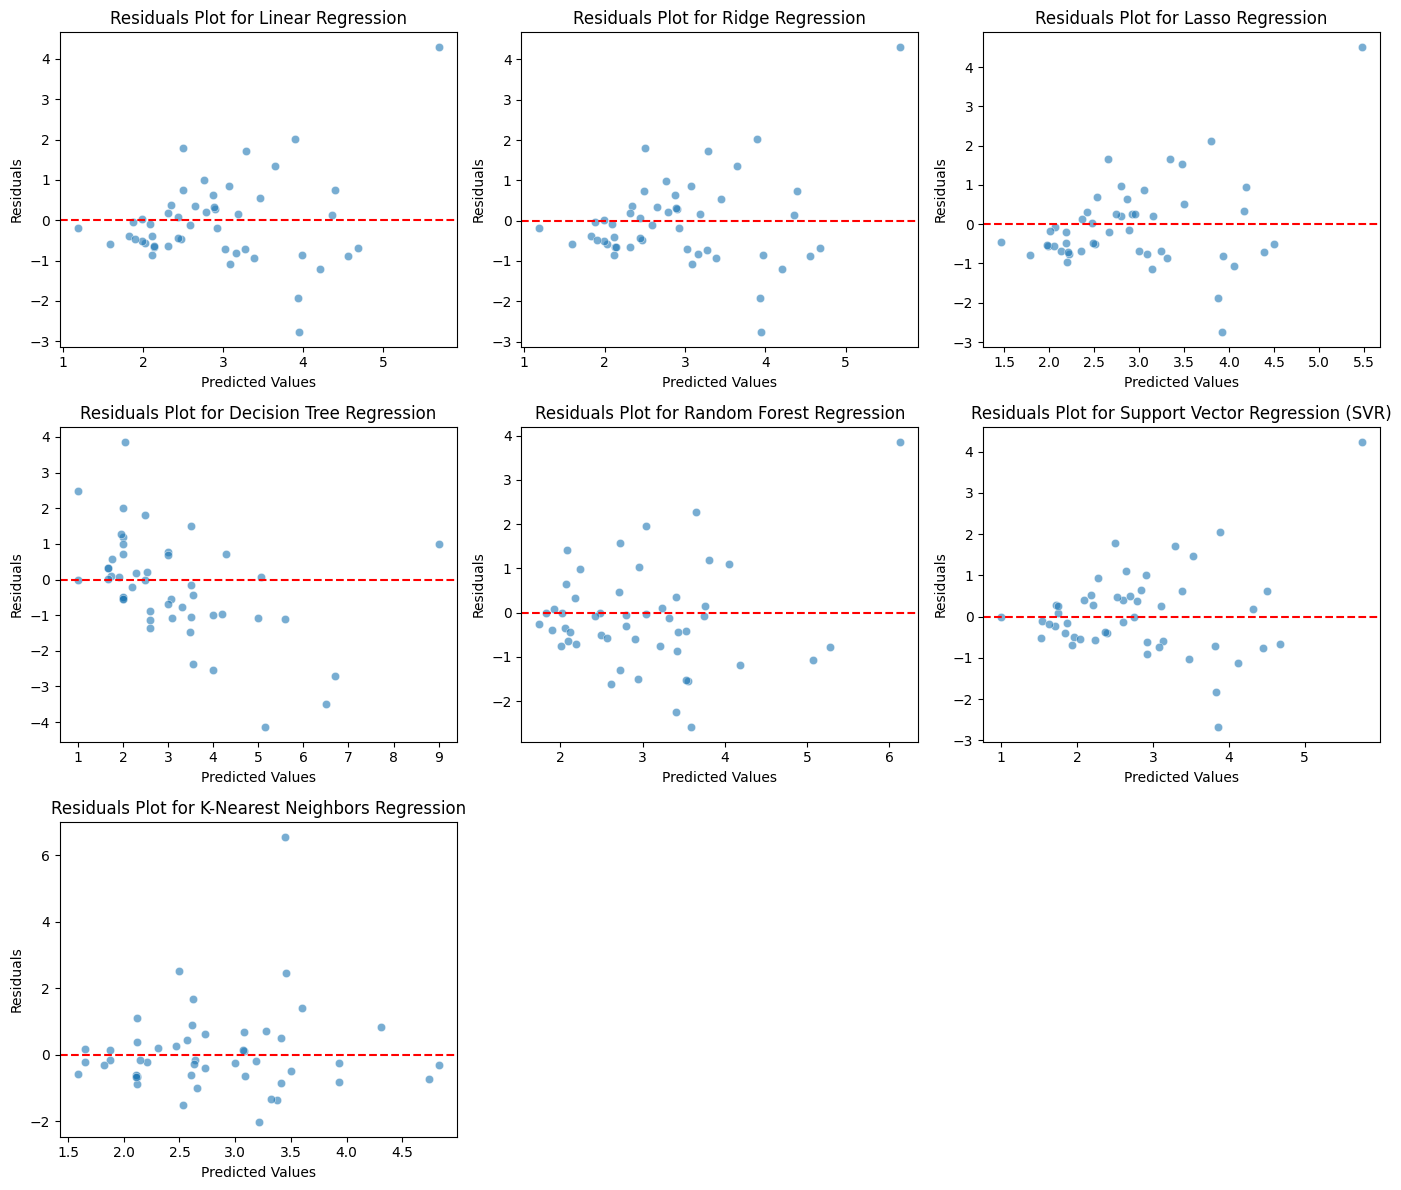

In [29]:
models = {
    "Linear Regression": linear_model,
    "Ridge Regression": ridge_model,
    "Lasso Regression": lasso_model,
    "Decision Tree Regression": tree_model,
    "Random Forest Regression": rf_model,
    "Support Vector Regression (SVR)": svr_model,
    "K-Nearest Neighbors Regression": knn_model
}

plt.figure(figsize=(14, 12))
n_models = len(models)

for i, (model_name, model) in enumerate(models.items(), start=1):
    y_pred = model.predict(X_test)
    residuals = y_test - y_pred
    
    plt.subplot(3, 3, i)  
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title(f"Residuals Plot for {model_name}")

plt.tight_layout()
plt.show()


From here we can see the corresponding residual plots for each and every models 

## Insights
- The restaurent should also focus on the total bill as it has a high correlation with the tip amount.
- Higher number of people in a table should be given higher priority as they tend to tip more.
- The restaurent should target their best service to customers on the Sundays and increase quality of services on the Friday to make the tip rate higher. 
- The restaurent should also focus on the dinner time to increase the tip rate and increase the quality of services for lunch time as well.
